In [ ]:
!pip install tensorflow keras sklearn matplotlib pandas pil

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
import os
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

In [ ]:
import os

In [ ]:
os.getcwd()

In [ ]:
cd/kaggle/input/gtsrb-german-traffic-sign/Train

In [ ]:
os.getcwd()

In [2]:
import os
import cv2
import numpy as np

# Loading dataset
data = []
labels = []
classes = 43
cur_path = os.getcwd()

for i in os.listdir(cur_path):
    dir = cur_path + '/' + i
    for j in os.listdir(dir):
        img_path = dir + '/' + j
        img = cv2.imread(img_path, -1)
        # Convert the image to grayscale
        gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        # Resize the image
        gray_img = cv2.resize(gray_img, (30, 30), interpolation=cv2.INTER_NEAREST)
        # Normalize the grayscale image data
        gray_img = gray_img / 255.0
        # Expand dimensions to match input shape for CNN (height, width, channels)
        gray_img = np.expand_dims(gray_img, axis=-1)
        data.append(gray_img)
        labels.append(i)

data = np.array(data)
labels = np.array(labels)


In [8]:
print(data.shape, labels.shape)
#Splitting training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(39209, 30, 30, 3) (39209,)
(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)


In [9]:
#Converting the labels into one hot encoding
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

In [10]:
y_train.shape, y_test.shape

((31367, 43), (7842, 43))

In [11]:
train_data=pd.read_csv('/kaggle/input/gtsrb-german-traffic-sign/Train.csv',usecols=['ClassId','Path','Width','Height'],)
test_data=pd.read_csv('/kaggle/input/gtsrb-german-traffic-sign/Test.csv',usecols=['ClassId','Path','Width','Height'],)

train_data.rename({'ClassId':'label','Path':'path'},inplace=True,axis=1)
test_data.rename({'ClassId':'label','Path':'path'},inplace=True,axis=1)

train_data.head()

,Width,Height,label,path
0,27,26,20,Train/20/00020_00000_00000.png
1,28,27,20,Train/20/00020_00000_00001.png
2,29,26,20,Train/20/00020_00000_00002.png
3,28,27,20,Train/20/00020_00000_00003.png
4,28,26,20,Train/20/00020_00000_00004.png


In [12]:
test_data.head()

,Width,Height,label,path
0,53,54,16,Test/00000.png
1,42,45,1,Test/00001.png
2,48,52,38,Test/00002.png
3,27,29,33,Test/00003.png
4,60,57,11,Test/00004.png


In [13]:
print('NO. of classes')
print(train_data['label'].nunique())

NO. of classes
43


In [14]:
cd/kaggle/input/gtsrb-german-traffic-sign

/kaggle/input/gtsrb-german-traffic-sign


In [15]:
os.getcwd()

'/kaggle/input/gtsrb-german-traffic-sign'

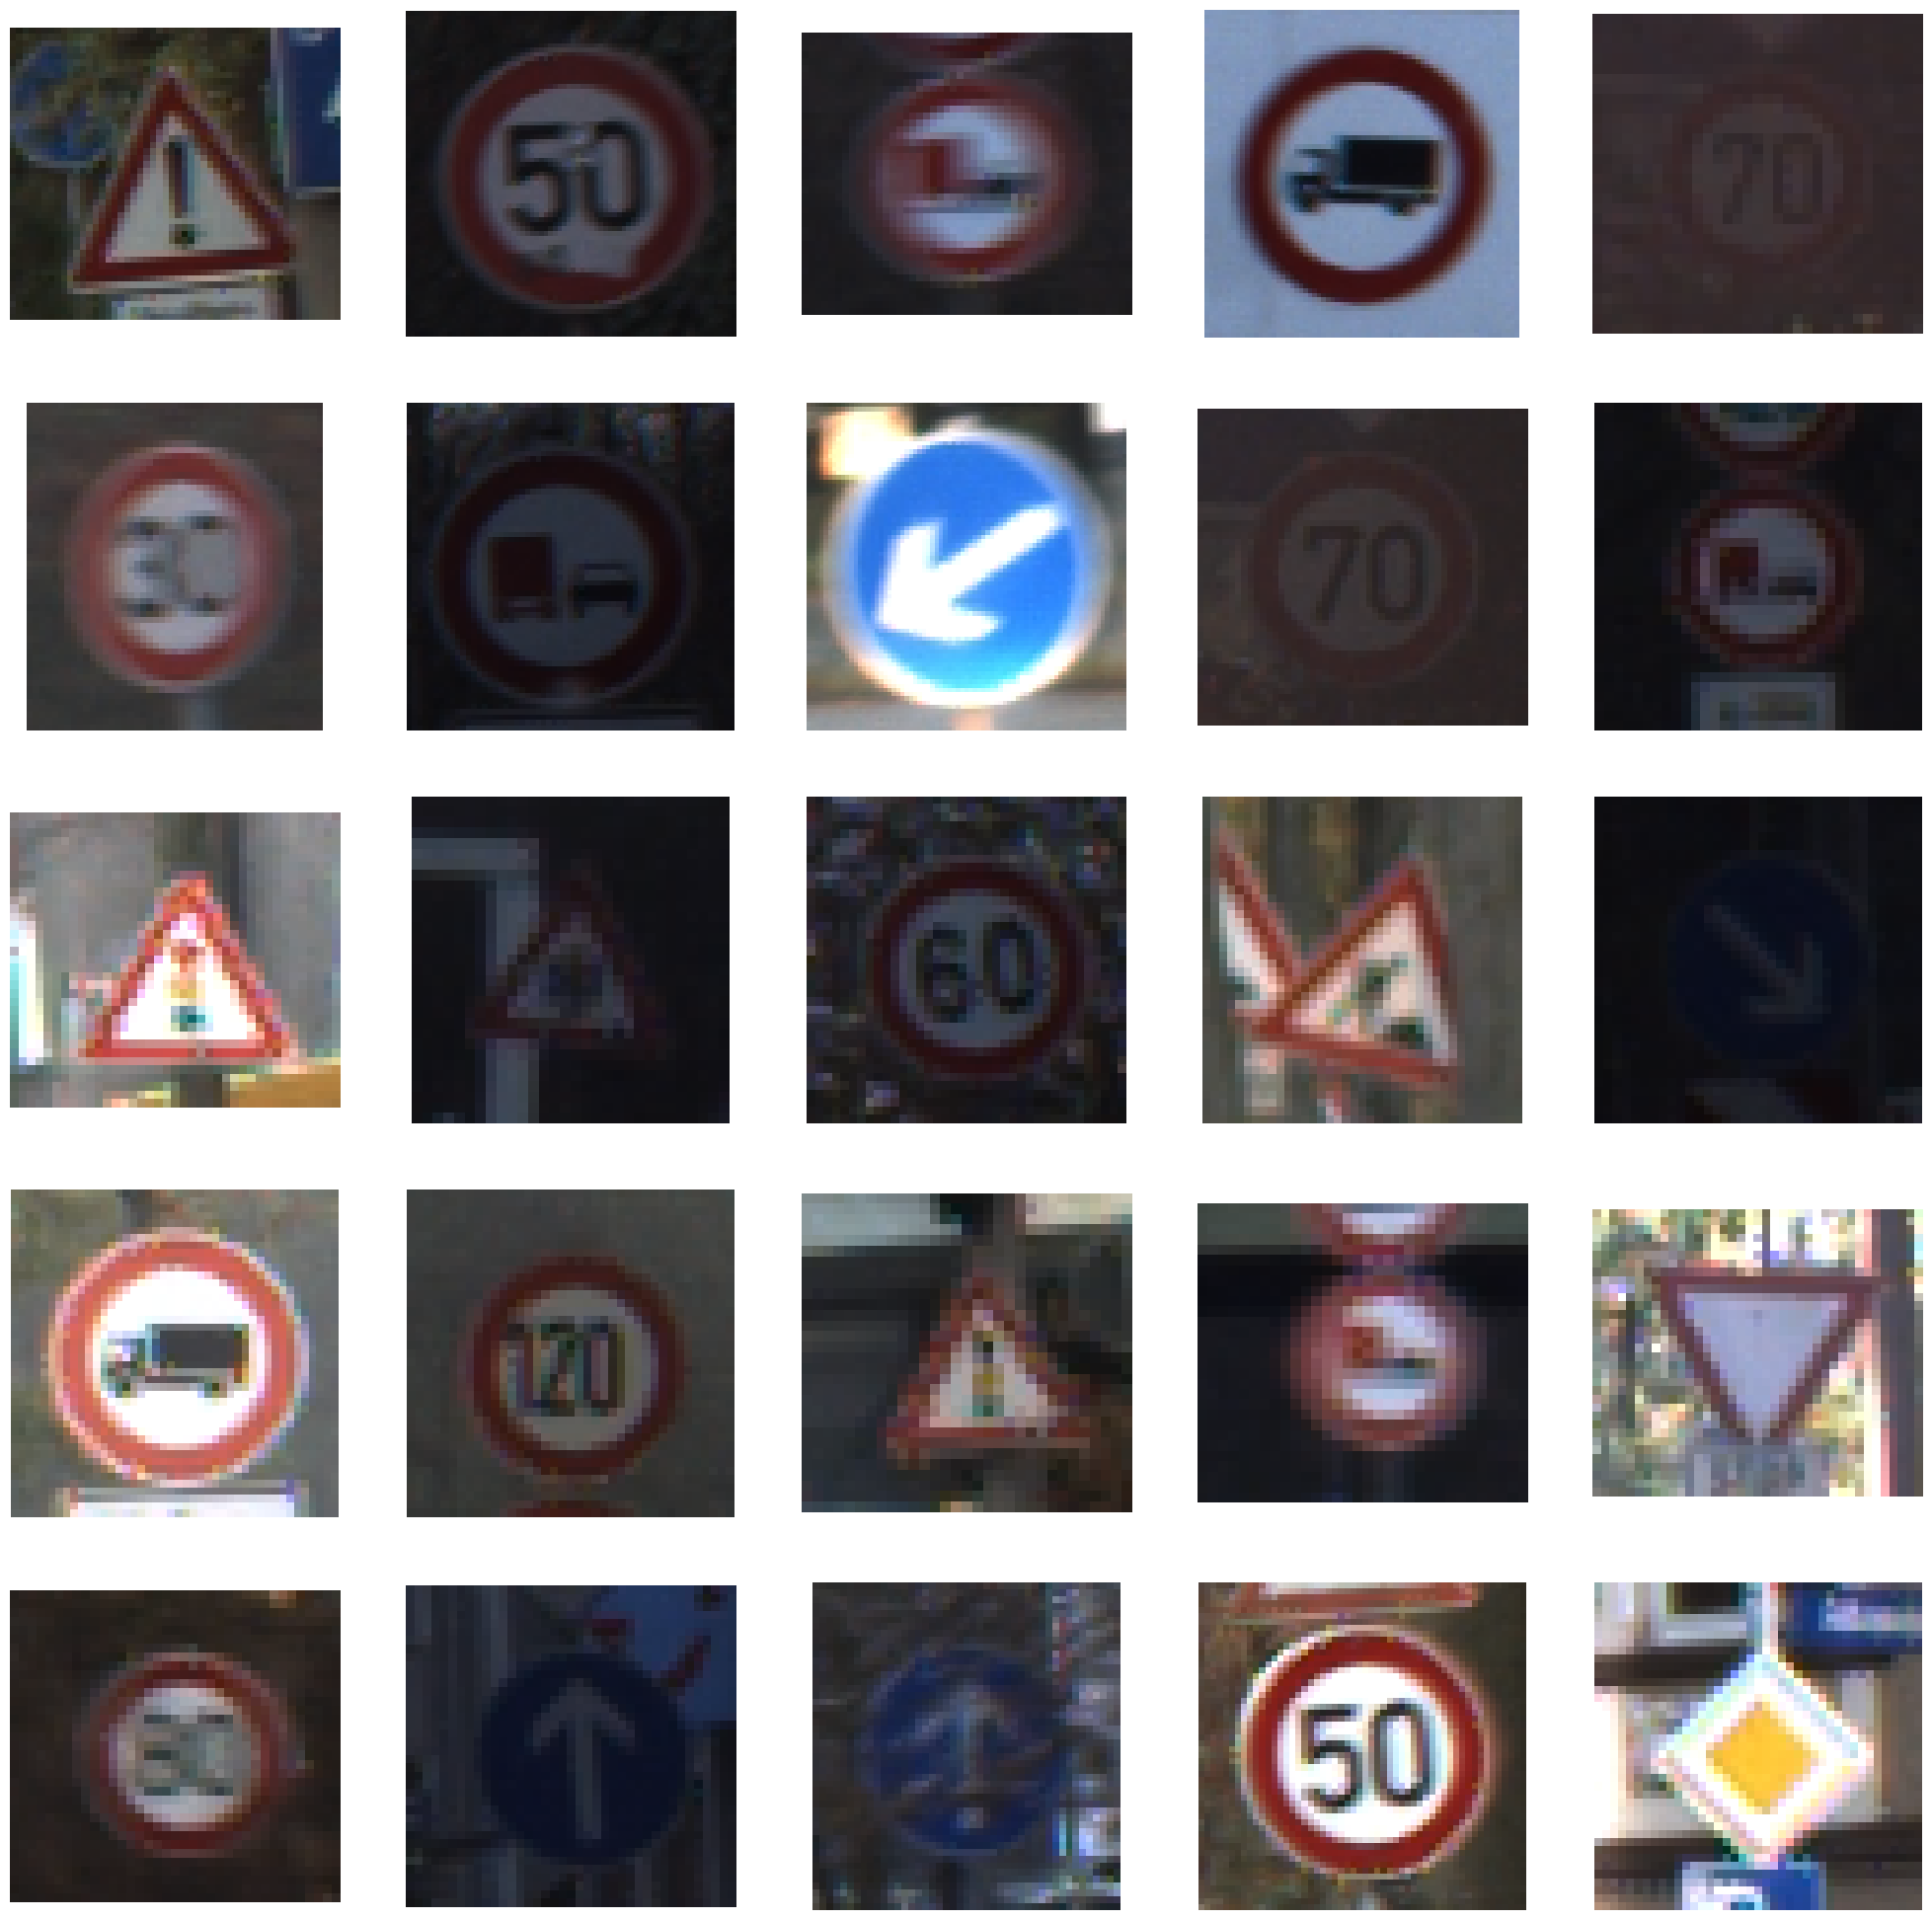

In [16]:
import random
from matplotlib.image import imread
data_dir= os.getcwd()
imgs=test_data['path'].values
plt.figure(figsize=(25,25))

for i in range(1,26):
    plt.subplot(5,5,i)
    random_image_path=data_dir+'/'+random.choice(imgs)
    random_image=imread(random_image_path)
    plt.imshow(random_image)
    
    plt.axis('off')
    plt.xlabel(random_image.shape[0],fontsize=20)
    plt.ylabel(random_image.shape[0],fontsize=20)
    

In [17]:
cd/kaggle/input/gtsrb-german-traffic-sign/Train

/kaggle/input/gtsrb-german-traffic-sign/Train


Text(0, 0.5, 'Number of images')

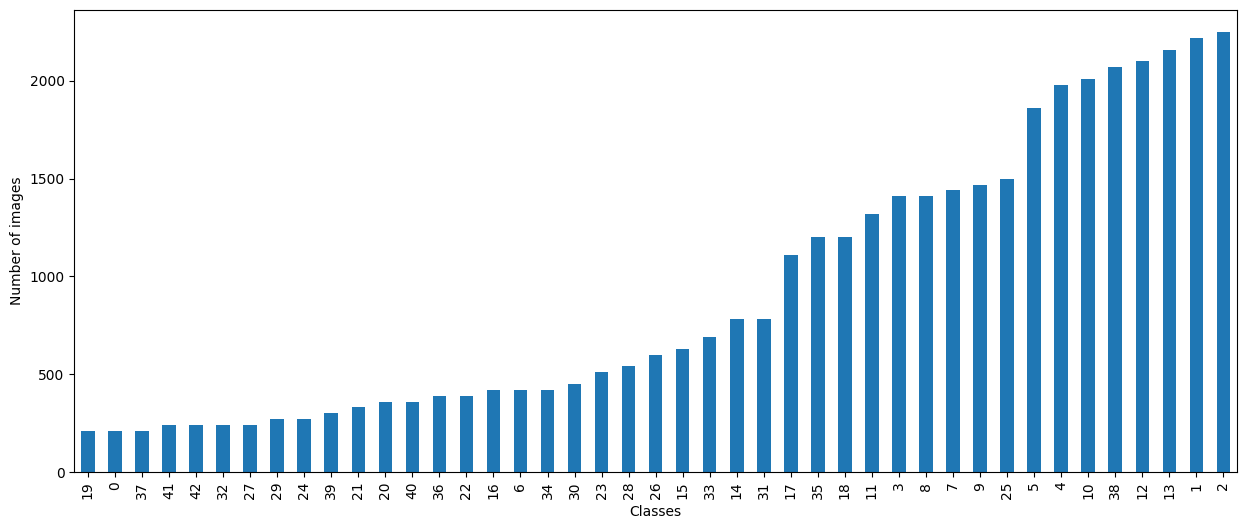

In [18]:
# number of images in each class
data_dic = {}
for folder in os.listdir(cur_path):
    data_dic[folder] = len(os.listdir(cur_path + '/' + folder))

data_df= pd.Series(data_dic)
plt.figure(figsize = (15, 6))
data_df.sort_values().plot(kind = 'bar')
plt.xlabel('Classes')
plt.ylabel('Number of images')

In [32]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, Dense, BatchNormalization

# Building the model
model = Sequential()

# First Layer with Batch Normalization
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:], padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2), padding='same'))
model.add(Dropout(rate=0.25))

# Second Layer with Batch Normalization
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2), padding='same'))
model.add(Dropout(rate=0.25))

# Additional Layer
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2), padding='same'))
model.add(Dropout(rate=0.25))

# Dense Layer
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))


/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [33]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)               │ (None, 26, 26, 32)     │         2,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 22, 22, 32)     │        25,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 11, 11, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 11, 11, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 9, 9, 64)       │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 7, 7, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 3, 3, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 3, 3, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 1, 1, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 1, 1, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 1, 1, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 43)             │        11,051 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 201,419 (786.79 KB)

 Trainable params: 201,419 (786.79 KB)

 Non-trainable params: 0 (0.00 B)

In [21]:
!pip install visualkeras
import visualkeras

/opt/conda/lib/python3.10/site-packages/visualkeras/layered.py:86: UserWarning: The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.
  warnings.warn("The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.")


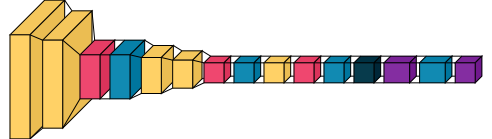

In [34]:
visualkeras.layered_view(model)

In [35]:
#Compilation of the model
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
epochs = 20
history = model.fit(X_train, y_train, batch_size=64, epochs=epochs, validation_data=(X_test, y_test))
model.save("my_model.h5")

Epoch 1/25
491/491 ━━━━━━━━━━━━━━━━━━━━ 61s 119ms/step - accuracy: 0.1955 - loss: 3.6874 - val_accuracy: 0.7686 - val_loss: 0.8166
Epoch 2/25
491/491 ━━━━━━━━━━━━━━━━━━━━ 58s 119ms/step - accuracy: 0.6840 - loss: 1.0774 - val_accuracy: 0.8871 - val_loss: 0.4016
Epoch 3/25
491/491 ━━━━━━━━━━━━━━━━━━━━ 59s 120ms/step - accuracy: 0.8197 - loss: 0.6212 - val_accuracy: 0.9478 - val_loss: 0.1938
Epoch 4/25
491/491 ━━━━━━━━━━━━━━━━━━━━ 58s 118ms/step - accuracy: 0.8763 - loss: 0.4316 - val_accuracy: 0.9573 - val_loss: 0.1512
Epoch 5/25
491/491 ━━━━━━━━━━━━━━━━━━━━ 58s 119ms/step - accuracy: 0.8997 - loss: 0.3455 - val_accuracy: 0.9649 - val_loss: 0.1274
Epoch 6/25
491/491 ━━━━━━━━━━━━━━━━━━━━ 82s 119ms/step - accuracy: 0.9093 - loss: 0.3263 - val_accuracy: 0.9756 - val_loss: 0.0906
Epoch 7/25
491/491 ━━━━━━━━━━━━━━━━━━━━ 58s 119ms/step - accuracy: 0.9262 - loss: 0.2594 - val_accuracy: 0.9730 - val_loss: 0.0945
Epoch 8/25
491/491 ━━━━━━━━━━━━━━━━━━━━ 58s 118ms/step - accuracy: 0.9295 - loss: 0

OSError: [Errno 30] Unable to synchronously create file (unable to open file: name = 'my_model.h5', errno = 30, error message = 'Read-only file system', flags = 13, o_flags = 242)

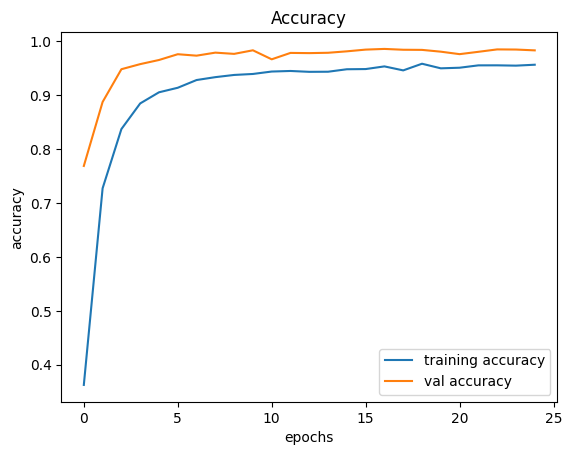

In [36]:
#plotting graphs for accuracy 
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

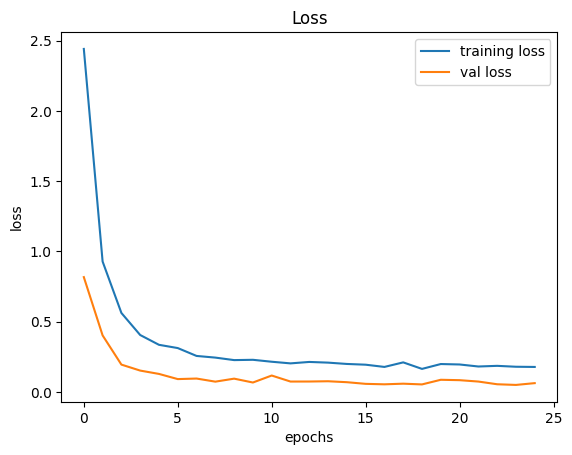

In [37]:
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [38]:
# Score
score = model.evaluate(X_test, y_test, verbose=0)
print('Test Loss', score[0])
print('Test accuracy', score[1])

Test Loss 0.06181909143924713
Test accuracy 0.9827849864959717


In [39]:
y_pred = model.predict(X_test)
y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

246/246 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step


In [40]:
from sklearn.metrics import classification_report
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97        41
           1       0.98      0.97      0.98       444
           2       0.99      0.95      0.97       444
           3       0.99      0.96      0.97       295
           4       0.98      1.00      0.99       396
           5       0.90      0.98      0.93       338
           6       1.00      0.99      0.99        87
           7       0.98      0.98      0.98       324
           8       0.98      0.98      0.98       260
           9       1.00      1.00      1.00       274
          10       1.00      1.00      1.00       417
          11       0.99      1.00      0.99       258
          12       1.00      1.00      1.00       453
          13       1.00      0.99      1.00       431
          14       0.99      1.00      1.00       165
          15       0.99      0.99      0.99       134
          16       1.00      1.00      1.00        72
          17       1.00    

<Axes: >

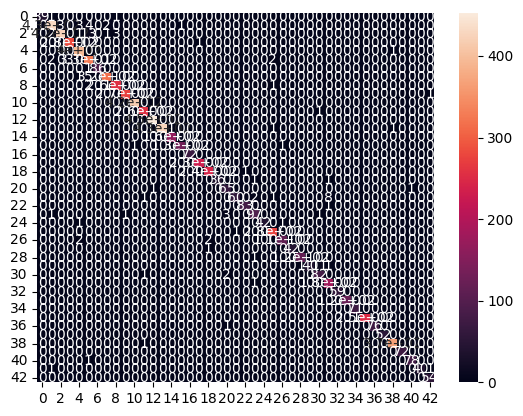

In [41]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_class, y_pred_class)
import seaborn as sns
sns.heatmap(cm,annot=True)


In [42]:
# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred_class,y_test_class)
score

0.9827850038255547

In [44]:
model.save('/kaggle/working/classifier.h5')